In [2]:
import numpy as np #para processamento numérico em Python
import matplotlib.pyplot as plt #para os gráficos
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd #para a leitura de shapefiles
import seaborn as sns #para fazer o mapa de kernel
from matplotlib.patches import Ellipse #para projetar a elipse

# pointpats --> análise espacial de pontos
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse
from pointpats import PointPattern
import pointpats.quadrat_statistics as qs
from pointpats.distance_statistics import G, F, K, Genv, Fenv, Kenv
from pointpats import PoissonPointProcess

In [3]:
mun_sp = gpd.read_file('../Data/SIRGAS_limites_municipios_estado_sao_paulo/SIRGAS_limites_municipais.shp')
monumentos = gpd.read_file('../Data/SIRGAS_SHP_monumento/SIRGAS_SHP_monumento_point.shp')

In [9]:
mun_sp.set_crs(epsg=31983, inplace=True)
monumentos.set_crs(epsg=31983, inplace=True)
print(mun_sp.crs)
print(monumentos.crs)

EPSG:31983
EPSG:31983


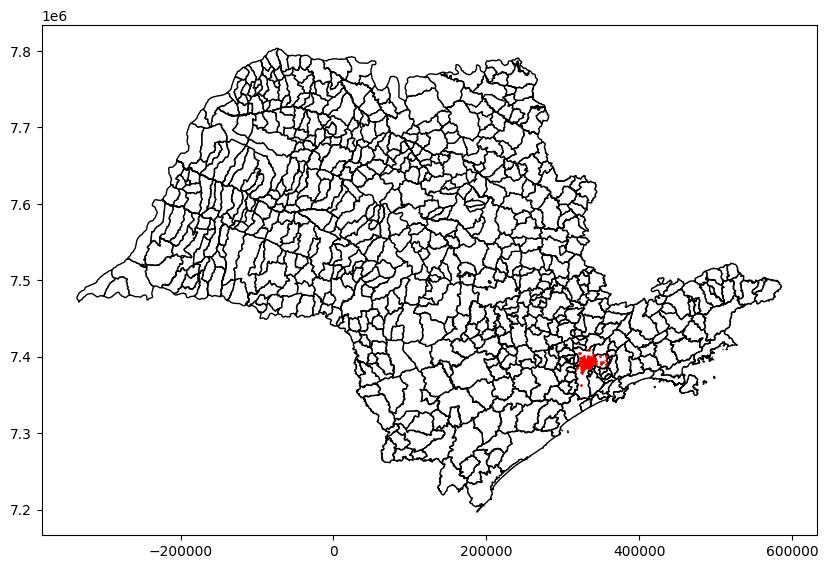

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
mun_sp.plot(ax=ax, color='white', edgecolor='black')
monumentos.plot(ax=ax, color='red', markersize=1, label = 'Monumentos')
plt.show()

In [14]:
mun_sp = gpd.sjoin(mun_sp, monumentos, op='contains')

/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


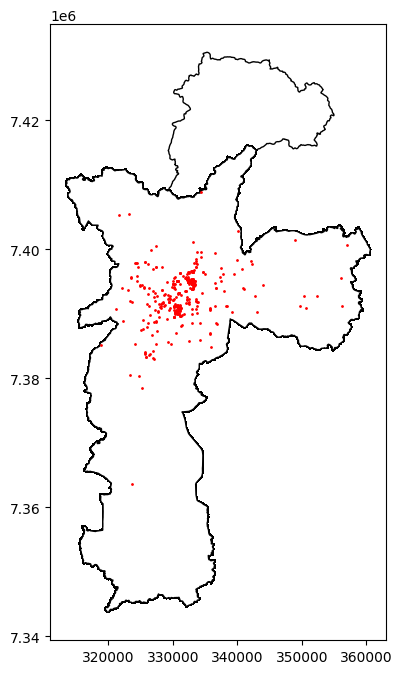

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
mun_sp.plot(ax=ax, color='white', edgecolor='black')
monumentos.plot(ax=ax, color='red', markersize=1, label = 'Monumentos')
plt.show()

/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


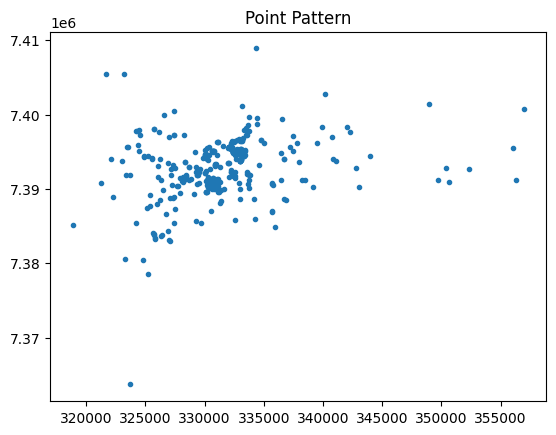

In [19]:
x = monumentos.geometry.x
y = monumentos.geometry.y

pontos = np.vstack([x,y]).T
pp = PointPattern(pontos)
pp.plot()

### Quadrats

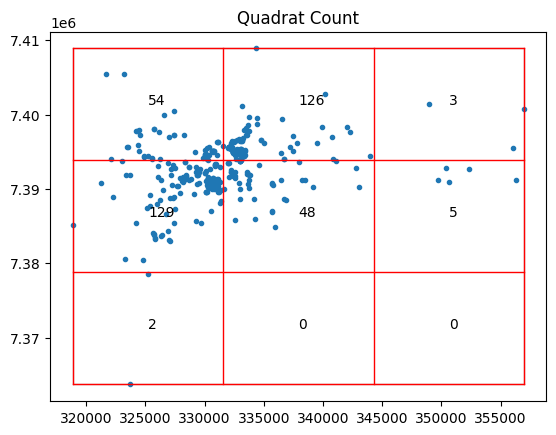

In [22]:
q_r = qs.QStatistic(pp, shape='rectangle', nx=3, ny=3)
q_r.plot()

### Mapa de Kernel

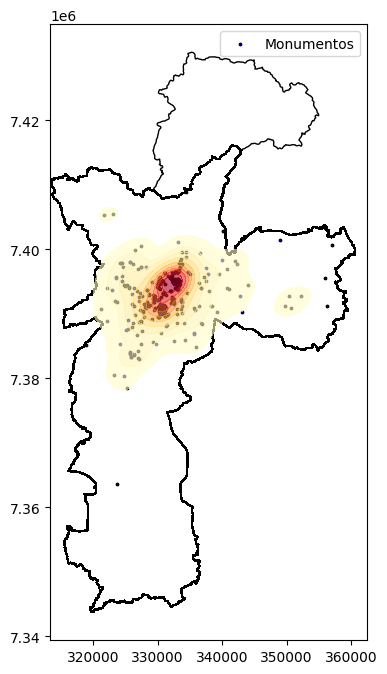

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
monumentos.plot(ax=ax, color='blue', edgecolor='black', markersize = 3, label='Monumentos')
mun_sp.plot(ax=ax, color='none', edgecolor='black')
sns.kdeplot(x=pontos[:,0], y=pontos[:,1], fill=True, cmap='YlOrRd', ax=ax, alpha=0.6)
plt.legend()
plt.show()

### Função K ripley

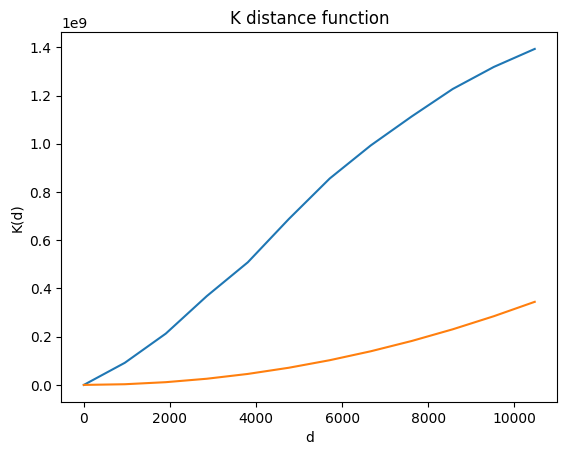

In [32]:
kp = K(pp)
kp.plot()

In [33]:
sim = PoissonPointProcess(pp.window, pp.n, 100, asPP=True)

/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/shapes.py:1923: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/shapes.py:103: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


In [40]:
from pointpats.distance_statistics import Kenv

realizations = PoissonPointProcess(pp.window, pp.n, 250, asPP = True)

kenv = Kenv(pp, intervals=20, realizations=realizations)
kenv.plot()

/home/bernardo/Documents/insper8thSem/GeoRef/geopy/lib/python3.10/site-packages/libpysal/cg/shapes.py:103: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

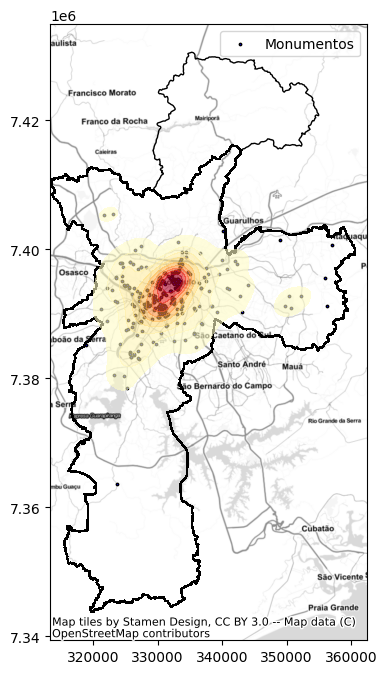

In [43]:
import contextily
fig, ax = plt.subplots(figsize=(10,8))
monumentos.plot(ax=ax, color='blue', edgecolor='black', markersize = 3, label='Monumentos')
mun_sp.plot(ax=ax, color='none', edgecolor='black')
sns.kdeplot(x=pontos[:,0], y=pontos[:,1], fill=True, cmap='YlOrRd', ax=ax, alpha=0.6)
contextily.add_basemap(ax, crs=mun_sp.crs.to_string(), source=contextily.providers.Stamen.TonerLite)
plt.legend()
plt.show()